# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [6]:
!pip install openpyxl

df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [8]:
df.shape

(1653, 30)

In [11]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [53]:
df.sort_values(by='networthusbillion', ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [29]:
df.groupby(by='gender').size()

gender
female     180
male      1473
dtype: int64

## 4b) What percent is that?

In [40]:
df_gender = df.groupby(by='gender').size()
sum = df_gender['female'] + df_gender['male']

male_bill = (df_gender['male'] / sum) * 100
print(f"{round(male_bill, 0)}% of billionares are male")

89.0% of billionares are male


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [57]:
female = df[df['gender'] == 'female']
female_mean = female.networthusbillion.mean()

male = df[df['gender'] == 'male']
male_mean = male.networthusbillion.mean()

print(f"The average wealth for a female billionaire is ${round(female_mean, 3)} billion dollars, while the average wealth for a male billionaire is ${round(male_mean, 3)} billion dollars.")

The average wealth for a female billionaire is $3.921 billion dollars, while the average wealth for a male billionaire is $3.903 billion dollars.


In [58]:
print(f"The average wealths might not seem that different, but remember that there are way more male billionaires than female ones!")

The average wealths might not seem that different, but remember that there are way more male billionaires than female ones!


## 5a) What is the most common source/type of wealth?

In [65]:
df.groupby(by='typeofwealth').size().sort_values(ascending=False)

typeofwealth
inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
dtype: int64

In [66]:
print("The most commmon type of wealth is inherited wealth.")

The most commmon type of wealth is inherited wealth.


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [121]:
df.groupby(['gender', 'typeofwealth']).size().groupby('gender').apply(lambda x: x.sort_values(ascending=False))

gender  gender  typeofwealth            
female  female  inherited                   142
                founder non-finance          21
                executive                     6
                self-made finance             6
                privatized and resources      5
male    male    founder non-finance         446
                inherited                   364
                self-made finance           338
                privatized and resources    187
                executive                   136
dtype: int64

In [137]:
df.groupby(by='gender').typeofwealth.value_counts(normalize=True).round(2)

gender  typeofwealth            
female  inherited                   0.79
        founder non-finance         0.12
        executive                   0.03
        self-made finance           0.03
        privatized and resources    0.03
male    founder non-finance         0.30
        inherited                   0.25
        self-made finance           0.23
        privatized and resources    0.13
        executive                   0.09
Name: proportion, dtype: float64

In [125]:
print("The most common type of wealth is different between men and women. Most female billionaires inherited their wealth, while most male billionaires made their money by being founder in non-finance industries.")

The most common type of wealth is different between men and women. Most female billionaires inherited their wealth, while most male billionaires made their money by being founder in non-finance industries.


## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

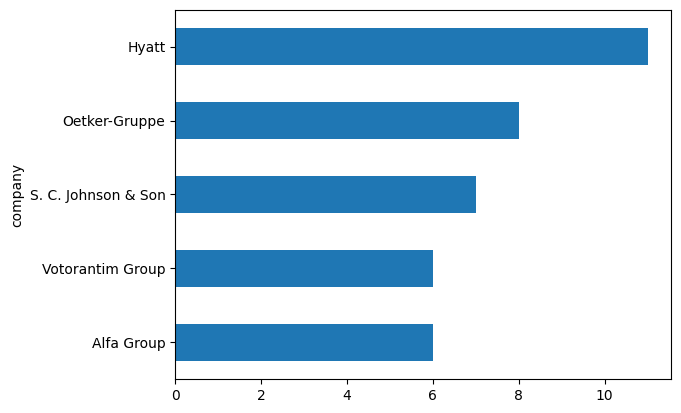

In [156]:
import matplotlib.pyplot as plt

df.company.value_counts().head().sort_values(ascending=True).plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

In [193]:
top_companies = df.company.value_counts().head(5)

top5_total= df[df['company'].isin(top_companies.index)]

top5_sum = top5_total.networthusbillion.sum()

print(f"The billionaires in these companies collectively have ${round(top5_sum, 2)} billion.")


The billionaires in these companies collectively have $120.3 billion.


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [204]:
df.groupby('citizenship').networthusbillion.sum().sort_values(ascending=False).head(10)

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [208]:
age = df.age.mean()

print(f"The average billionaire is {int(round(age, 0))} years old.")

The average billionaire is 63 years old


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [220]:
self_made = df[df['selfmade'] == 'self-made']
self_made_mean = self_made.age.mean()

not_self_made = df[df['selfmade'] != 'self-made']
not_self_made_mean = not_self_made.age.mean()

print(f"Self-made billionaires are on average {int(self_made_mean)} years old, while non self-made billionaires are on average {int(not_self_made_mean)} years old.")

Self-made billionaires are on average 62 years old, while non self-made billionaires are on average 65 years old.


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [252]:
youngest = df.sort_values('age').head(3)

print("Here are the three youngest billionaires:")
for index, person in youngest.iterrows():
    print(f"{person['name']} is {int(person['age'])} years old.")

Here are the three youngest billionaires:
Perenna Kei is 24 years old.
Dustin Moskovitz is 29 years old.
Mark Zuckerberg is 29 years old.


In [270]:
oldest = df[df['age'].notna()].sort_values('age').tail(3)
oldest

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN


In [273]:
print("Here are the three oldest billionaires:")
for index, person in oldest.iterrows():
    print(f"{person['name']} is {int(person['age'])} years old.")

Here are the three oldest billionaires:
Kirk Kerkorian is 96 years old.
Karl Wlaschek is 96 years old.
David Rockefeller, Sr. is 98 years old.


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

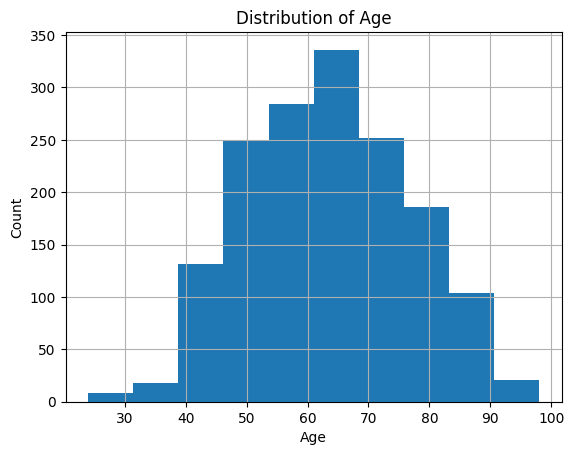

In [284]:
df.hist('age')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

plt.show()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

Text(0.5, 1.0, "Billionaires' Net Worth Compared to Age")

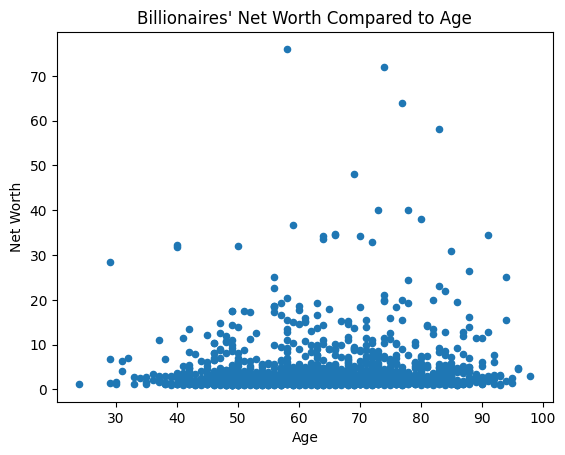

In [288]:
df.plot(x='age', y='networthusbillion', kind='scatter')

plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title("Billionaires' Net Worth Compared to Age")

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [319]:
top_10 = df.sort_values('networthusbillion', ascending=False).head(10)
top_10

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


Text(0.5, 1.0, 'Top 10 Richest Billionaires')

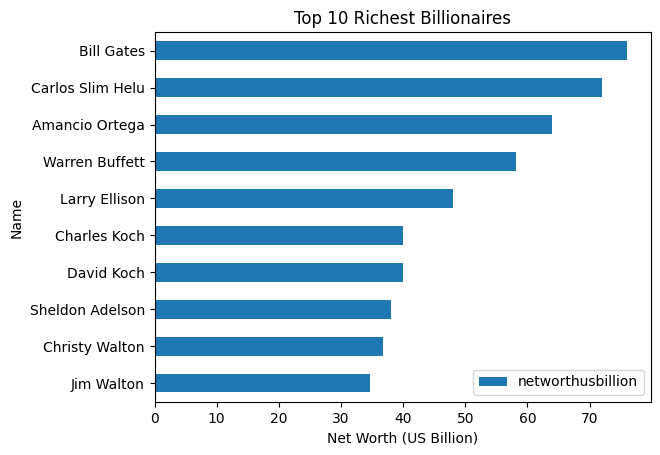

In [323]:
top_10.sort_values('networthusbillion', ascending=True).plot(y='networthusbillion', x='name', kind='barh')

plt.xlabel('Net Worth (US Billion)')
plt.ylabel('Name')
plt.title("Top 10 Richest Billionaires")